## References

1. Elias M. Stein & Rami Shakarchi, Complex Analysis, Princeton University Press, 2003.
2. Kir’yatskiĭ, E. & Kir’yatskiĭ, E.. . Properties of analytic functions with nonzero order n divided difference on the half-plane and unit disk. Siberian Mathematical Journal. 54. 10.1134/S0037446613030117. 2013.
3. 蒋尔雄, 赵风光, 苏仰锋, 数值逼近 (第二版), 复旦大学出版社, 2008.

# 3 插值

已知 $(x_i,y_i),\ i=1,2,\dotsc,n$ (且 $x_i$ 互不相等) 均在方程 $y=f(x)$ 上. 求解符合要求的 $f(x)$. 称为插值 (interpolation).

## 多项式插值

若 $f(x)$ 为 (不超过) $n-1$ 次多项式. 则 $f(x)$ 有唯一解.
$$f(x) = a_0+a_1x+\dotsc +a_{n-1}x^{n-1}$$

#### Vandermonde 
可以通过 Vandermonde 行列式解出, 但是 Vandermonde 矩阵数值上通常是病态的 (傅里叶矩阵除外). 但是这直接说明了满足要求的 (不超过) $n-1$ 次多项式是唯一的, 所以接下来的所有插值公式是等价的.
$$\left[\begin{matrix}1 & x_1 &\dotsc & x_1^{n-1}\\
1 & x_2 & \dotsc & x_2^{n-1}\\
\vdots & \vdots & \ddots & \vdots\\
1 & x_n & \dotsc & x_n^{n-1}\end{matrix}\right]
\left[\begin{matrix}a_0 \\ a_1 \\ \vdots \\ a_{n-1}
\end{matrix}\right]=\left[\begin{matrix}y_1 \\ y_2 \\ \vdots \\ y_n
\end{matrix}\right]
$$

#### Lagrange
可以通过拉格朗日 (Lagrange) 插值,
$$f(x) = \sum_{k=1}^n f(x_k)\prod_{j\neq k} \frac{x - x_j}{x_k - x_j}
$$

若对所有分母 $\prod_{j\neq k}\frac{1}{x_k - x_j}$ 用 $O(n^2)$ 作**预处理**计算, 以后每次计算一个函数值 $f(x)$ 只需 $O(n)$ 时间复杂度. 

反过来, 求解系数病态的 Vandermonde 矩阵的线性方程组也可以用这样的方法解.

#### Neville

可以作归纳 / 递推法, 若 $p_1(x),p_2(x)$ 分别拟合 $n-1$ 个点, 如下:
$$p_1(x_i) = y_i\quad ,i=1,2,\dotsc,n-1\\
p_2(x_i) = y_i\quad ,i = 2,\dotsc, n-1,n$$
合并两者, 取 
$$p(x) = \frac{1}{x_1 - x_n}\left((x-x_n)p_1(x) - (x - x_1)p_2(x)\right)$$

特别地, 若 $x_1\leqslant x\leqslant x_n$, 则 $p(x)$ 是 $p_1(x)$ 与 $p_2(x)$ 的凸组合. 进一步, 这表明误差也是凸组合, 所以是数值比较稳定的.

#### Newton

可以作归纳 / 递推法, 若 $p_{n-1}(x)$ 拟合了前 $n-1$ 个点, 如下:
$$p_{n-1}(x_i) = y_i\quad ,i = 1,2,\dotsc, n-1$$
只需要在 $n-2$ 多项式基础上增加一个 $n-1$ 次多项式修正.
$$p_n(x) = p_{n-1}(x) + \alpha_n\prod_{i=1}^{n-1} (x-x_i)$$

代入 $p_n(x_n) = y_n$, 解得系数 $\alpha_n = \left(y_n - p_{n-1}(x_n)\right) \prod_{i=1}^{n-1} \frac{1}{x_n - x_i}$, 故
$$p_n(x) = p_{n-1}(x) + \left( y_n - p_{n-1}(x_n)\right)\prod_{i=1}^{n-1} \frac{x - x_i}{x_n - x_i}$$

又或者注意 <font color = red>$\alpha_n$ 恰为 $p_n(x)$ 最高次项系数</font>, 根据拉格朗日插值可得到等价形式 (系数).
$$p_n(x) = p_{n-1}(x) + \left( \sum_{k=1}^n y_k\prod_{j\neq k}\frac{1}{x_k - x_j}\right)\prod_{i=1}^{n-1} (x-x_i)$$

若对所有系数 $\alpha_k$ 用 $O(n^2)$ 作**预处理**计算, 以后每次计算一个函数值 $f(x)$ 只需 $O(n)$ 时间复杂度. 

牛顿法 (相比拉格朗日插值) 的一个优点在于其便于增加节点, 即多增加一个数据点可以继续拟合.

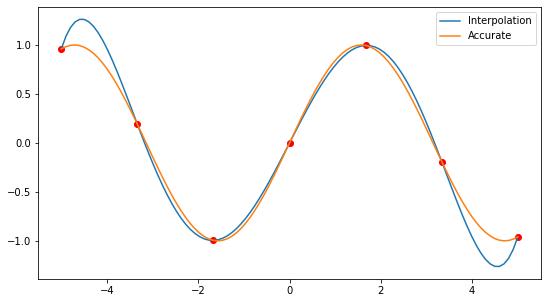

In [24]:
# 采用牛顿法实现的插值
import numpy as np
class Interpolation():
    def __init__(self, x = None, y = None):
        self.points = None 
        self.coeffs = None 
        if x is not None and y is not None: self.fit(x,y)

    def fit(self, x, y):
        x = np.array(x)
        self.points = x[:] # make a deep copy
        self.coeffs = []
        for i in range(1, 1+len(x)):
            s = sum(y[k] / np.prod(x[k] - x[:k]) / np.prod(x[k] - x[k+1:i]) for k in range(i))  
            self.coeffs.append(s)

    def pred(self, x):
        y = np.zeros(x.shape)
        p = np.ones(x.shape)
        for i in range(len(self.points)):
            y += self.coeffs[i] * p 
            p *= x - self.points[i]
        return y 

x = np.linspace(-5, 5, 7) # 在 [-5,5] 上选取等距的7个点
f = lambda t: np.sin(t)
x2 = np.linspace(-5, 5, 100)
y2 = Interpolation(x, f(x)).pred(x2) # 用7个点的值进行插值
from matplotlib import pyplot as plt 
plt.figure(figsize = (9,5))
plt.plot(x2, y2)
plt.plot(x2, f(x2))
plt.scatter(x, f(x), c='red')
plt.legend(['Interpolation', 'Accurate'])
plt.show()

#### 龙格现象

龙格现象 (Runge's phenonmenon) 指出: 如果对一个连续函数用等距节点插值, 插值函数不一定一致逼近原函数. 
例如 $\frac{1}{1+x^2}$ 在 $[-5,5]$ 的插值 12 个点结果如下图所示, 在边上会剧烈抖动.

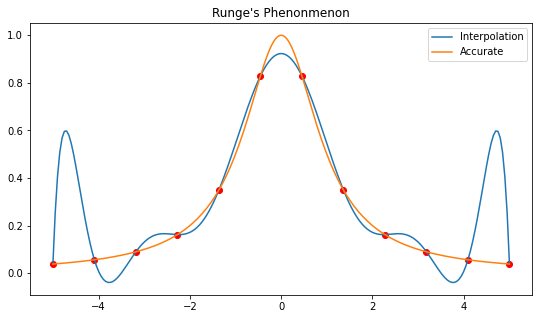

In [34]:
import numpy as np 
from matplotlib import pyplot as plt 

x = np.linspace(-5, 5, 12) # 在 [-5,5] 上选取等距的12个点
f = lambda t: 1 / (1 + t**2)
x2 = np.linspace(-5, 5, 200)
y2 = Interpolation(x, f(x)).pred(x2) # 用12个点的值进行插值
plt.figure(figsize = (9,5))
plt.plot(x2, y2)
plt.plot(x2, f(x2))
plt.scatter(x, f(x), c='red')
plt.legend(['Interpolation', 'Accurate'])
plt.title('Runge\'s Phenonmenon')
plt.show()

## 差商

牛顿插值中提到的最高次系数 $\alpha_n$ 有重大用处:

已知 $f(x)$ 在互不相同的 $n$ 个点 $x_1,x_2,\dotsc,x_n$ 的取值, 可递归地定义差商 (divided difference) 为
$$f[x_1,x_2,\dotsc,x_n] = \frac{f[x_2,x_3,\dotsc,x_n] - f[x_1,x_2,\dotsc,x_{n-1}]}{x_n - x_1}$$

称为 $n-1$ 阶差商. 特别地, $f[x_i] = f(x_i)$ 称为 $0$ 阶差商.

差商具有诸多性质, 如:

#### 最高次系数

**定理** $f[x_1,x_2,\dotsc,x_n]$ 就是在这 $n$ 个点插值多项式的最高次系数.

证: 归纳, $n=1$ 时已经成立, 若 $(n-1)$ 个点已经成立, 由 Neville 插值公式, $n$ 个点插值得到 $n-1$ 次多项式的最高次项系数为
$$[x^{n-1}]p_n(x) = [x^{n-1}]\frac{1}{x_1 - x_n}(p_1(x) - p_n(x)) = \frac{f[x_2,x_3,\dotsc,x_n] - f[x_1,x_2,\dotsc,x_{n-1}]}{x_n - x_1}$$

#### Lagrange

**定理** $f[x_1,x_2,\dotsc,x_n]$ 作为插值多项式的最高次系数, 可由拉格朗日插值直接确定

$$f[x_1,x_2,\dotsc,x_n]=\sum_{k=1}^n f(x_k)\prod_{j\neq k}\frac{1}{x_k - x_j}$$

#### 对称性

**定理** $f[x_1,x_2,\dotsc,x_n]$ 是关于 $x_1,\dotsc,x_n$ 的对称式, 其值与 $x_k$ 的排列无关 (由以上两条显然).


### 解析延拓

虽然看似 $f(x)$ 有奇点 $x_i = x_j (i\neq j)$, 但是实际上不一定这么糟糕. 以两个点构成的一阶差商为例, 倘若 $f$ 在区域内一阶可导,

$$f[x_1,x_2]= \frac{f(x_2) - f(x_1)}{x_2 - x_1}\stackrel{x_2\rightarrow x_1}{\longrightarrow }f'(x_1)$$

这说明此时一阶差商 $f[x_1,x]$ 在 $x_1$ 处是可去奇点. 因此可以补充定义 $f[x_1,x_1] = f'(x_1)$. 

实际上, 当 $f$ 在区域上解析, 可以改用柯西积分定义其差商.


#### 柯西积分

已知 $f(x)$ 在围道 $C$ 中解析, 且 $n$ 个点 (允许相同) $x_1,x_2,\dotsc,x_n$ 在围道内, 定义差商 (divided difference) 为

$$f[x_1,x_2,\dotsc,x_n]=\frac{1}{2\pi i}\int_C \frac{f(z)}{(z-x_1)\dotsm (z-x_n)}dz$$

显然 $f(\dotsc)$ 关于每个分量在 $C$ 内解析.

特别地, 若 $x_1,x_2,\dotsc,x_n$ 两两不同, 则该定义与上述定义一致, 由留数定理及上述定义的 Lagrange 形式显然.

#### 导数

若 $f(x)$ 在 $x_1$ 复邻域中解析,

$$f[\underbrace{x_1,x_1,\dotsc,x_1}_{n个x_1}]=\frac{1}{2\pi i}\int_C \frac{f(z)}{(z-x_1)^n}dz=\frac{f^{(n-1)}(x)}{(n-1)!}$$

#### Hermite 插值

由于差商允许有重复的点, 故 Newton 插值中也可以选取重复的点, 这即是 Newton 插值的推广, 称作 Hermite 插值. 如若选取 $n$ 重插值点 $x_1$, 则意义上需要插值多项式 $p(x)$ 满足
$$p^{(k)}(x_1) = f^{(k)}(x_1)\quad (k=0,1,2,\dotsc,n-1)$$

#### 中值定理

若实函数 $f(x):\mathbb R\rightarrow \mathbb R$ 存在 $(n-1)$ 阶连续导数, 则对于 $x_1,\dotsc,x_n$ 存在 $z$ 使得 $\min x_i\leqslant z\leqslant \max x_i$ 且
$$f[x_1,\dotsc,x_n]= \frac{f^{(n-1)}(z)}{(n-1)!}$$

证: 只证 $n\geqslant 2$ 的非平凡情形. 若 $x_1,\dotsc,x_n$ 互不相同, 存在 $(n-1)$ 次多项式 $p_n(x)$ 插值所有点,
$f(x_i) = p_n(x_i)$. 注意, 
$$g(x) = f(x) - p_{n}(x)$$
有 $x_1,\dotsc,x_{n}$ 这 $n$ 个零点, 连用 $n-1$ 次罗尔 (Rolle) 定理在区间上存在 $z$ 使得 $g^{(n-1)}(z) = 0$. 最后注意 $p^n(x)$ 为 $n-1$ 次多项式, 故其 $n-1$ 阶导数是最高次系数乘 $(n-1)!$ 即
$$0=g^{(n-1)}(z) = f^{(n-1)}(z) - (n-1)!f[x_1,\dotsc,x_n]$$
证毕. 若 $x_1,\dotsc,x_n$ 存在相同的, 可逐分量取极限.

#### 误差

若对实区间 $C$ 内函数 $f(x)$ 已有插值点为 $x_1,\dotsc,x_n$ 的 $n-1$ 次插值多项式 $p_{n-1}(x)$, 则其误差上界可被如下方式估计: 

对于任意一点 $x$, 可用牛顿插值, $f(x) - p_{n-1}(x) = f[x_1,\dotsc,x_n,x]\prod_{i=1}^n(x - x_i)$, 从而由中值定理

$$\Vert f(x) - p_{n-1}(x)\Vert_{\infty}=\Vert f[x_1,\dotsc,x_n,x]\prod_{i=1}^n(x - x_i)\Vert_{\infty}
\leqslant \frac{\Vert f^{(n-1)}\Vert_{\infty}}{(n-1)!}\sup_{x\in C} \prod_{i=1}^n|x - x_i|
$$

若能选取一组插值节点 (interpolation nodes) $x_i$ 使得 $\sup_{x\in C} \prod_{i=1}^n|x - x_i|$ 尽量小, 那么误差上界也会减小. 

接下来会证明, 若在区间 $[-1,1]$ 上, 选取 $x_k = \cos \frac{(2k+1)\pi}{2n}$ 是最优的.

### Chebyshev 多项式

也称第一类 Chebyshev 多项式 (Chebyshev polynomial of first kind). 给定 $n\in \mathbb N$, Chebyshev 多项式 $T_n(x)$ 是在 $x\in[-1,1]$ 上满足 $f_n(x) = \cos(n\arccos(x))$ 的函数. 显然它是 $n$ 次实多项式, 且与三角函数的 N **倍角公式**形式相同, 如
$$\begin{aligned} T_0(x) &= 1\\ T_1(x) &= x\\ T_2(x) &= 2x^2 - 1\\ T_3(x) &= 4x^3 - 3x\end{aligned}$$
因为 $f$ 是多项式, 它定义域可以不被限制在 $[-1,1]$ 中, 而可以在整个 $\mathbb R$ 上有定义甚至在整个复平面 $\mathbb C$ 上解析.

Chebyshev 多项式具有许多极值性质.


#### 零点

显然 $T_n(x)$ 的 $n$ 个零点是 $x_k=\cos \frac{(2k+1)\pi} {2n}$ 其中 $k=0,1,\dotsc, n-1$. 这在插值中被称为 Chebyshev 节点. 对于 $\forall x\in [-1,1]$, $$\prod_{k=1}^n |x - x_k| <2^{1-n}.$$

证: 注意根据多项式的零点式, $T_n(x) \equiv 2^{n-1}\prod_{k=1}^n (x - x_k)$, 再注意 $|T_n(x)|=|\cos(n\arccos(x))|\leqslant 1$ 即得.

#### 极小最大值

给定任意 $n$ 个互不相同的 $x_k\in \mathbb R$, 那么有如下不等式
$$\sup_{x\in [-1,1]}\prod_{k=1}^n |x-x_k| \geqslant 2^{1-n}$$
且等号当且仅当 $x_k$ 为 $n$ 次的 Chebyshev 节点取等. 这表明若对 $[-1,1]$ 上的点插值, 选取 Chebyshev 节点某种意义上是最优的.

证: 已证明 Chebyshev 节点取等. 下证不等号成立. 反证法, 若存在这样的 $x_1,\dotsc,x_n$ 使得 $\sup_{x\in [-1,1]}\prod_{k=1}^n |x-x_k| < 2^{1-n}$. 

令 $f(x) \equiv \prod_{k=1}^n (x - x_k)$ 是首一 $n$ 次多项式. 并设
$$g(x) = 2^{n-1}f(x) - T_n(x)$$
容易见 $g(x)$ 是不超过 $(n-1)$ 次多项式. 且
$$g(\cos (\frac{k\pi}{n})) = 2^{n-1}f(\cos (\frac{k\pi}{n})) - (-1)^k$$
根据反证假设, $k$ 为奇数时 $g(\cos (\frac{k\pi}{n}))>0$, 且 $k$ 为偶数时 $g(\cos (\frac{k\pi}{n}))<0$, 令 
$k$ 取遍 $0,1,\dotsc,n$ 根据介值定理 $g$ 有至少 $n$ 个根, 因此只能 $g(x)\equiv 0$, 即使这样也与反证假设矛盾, 故假设不成立, 原命题得证.

<br>

一般地, 对于区间 $[a,b]$ 的插值, 可以作仿射换元 $f(x) = g(\frac{(a+b)+(b-a)t}{2})$ 使得 $t\in [-1,1]$.

#### 递推

$T_n(x)$ 具有递推公式, $$T_{n+1}(x) = 2xT_n(x) - T_{n-1}(x)$$

证: 若 $x\in [-1,1]$, 取 $t=\arccos x$, 由和差化积 $\cos((n+1)t) + \cos((n-1)t)= 2\cos t \cos(nt) $ 显然. 由多项式的唯一性可见这是恒等式, 与 $x$ 定义域无关.

#### 延拓

将上述递推式看成二阶递推数列, 求得
$$T_n(x) = \frac{(x+\sqrt{x^2-1})^n + (x-\sqrt{x^2-1})^n}{2}$$


#### 正交性

$$\begin{align}
\int_{-1}^1 \frac{T_m(x)T_n(x)}{\sqrt{1-x^2}} {\mathrm d}x
&= \int_{-1}^{1} \cos{[m \arccos(x)]} \cos{[n\arccos(x)]} {\mathrm d}\arccos(x)\quad (\text{denote }\theta:= \arccos(x))\\
&= \int_0^\pi \cos(m\theta)\cos(n\theta) {\mathrm d\theta} \\
&= \frac12 \int_{0}^\pi \cos((m-n)\theta) {\mathrm d}\theta 
+ \frac12 \int_{0}^\pi \cos((m+n)\theta) {\mathrm d}\theta
\quad \left(\text{note that }\int_0^\pi \cos(k\pi) {\mathrm d}\theta = 
\begin{cases}
1, &k=0\\
0, &k\neq 0
\end{cases}\right)\\
&= 
\begin{cases}
\pi, & m=n=0\\
\frac{\pi}{2}, & m=n\neq 0\\
0, & m\neq n
\end{cases}
\end{align}$$


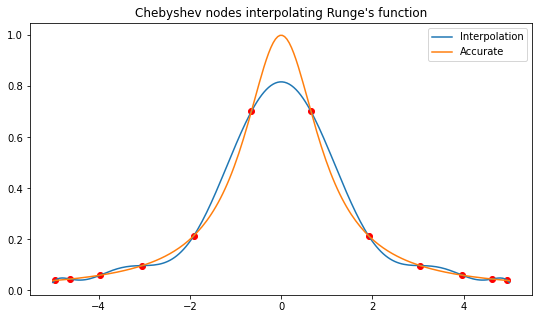

In [43]:
# 对于 1/(1+x*x), 选取 Chebyshev 节点而非等距节点来拟合, 可以克服龙格现象
import numpy as np 
from matplotlib import pyplot as plt 
n = 12
f = lambda t: 1 / (1 + t**2)
x = 5 * np.cos((np.arange(n) * 2 + 1) * (np.pi / 2 / n))   # 5 * cos((2k+1)pi / (2n))
x2 = np.linspace(-5, 5, 200)
y2 = Interpolation(x, f(x)).pred(x2)
plt.figure(figsize = (9, 5))
plt.plot(x2, y2)
plt.plot(x2, f(x2))
plt.scatter(x, f(x), c='red')
plt.legend(['Interpolation', 'Accurate'])
plt.title('Chebyshev nodes interpolating Runge\'s function')
plt.show()

## 三次样条插值

因为单纯地提高多项式次数进行插值并不稳定, 可以避免提高次数而改用分段函数. 三次样条插值 (cubic spline interpolation) 就是用分段三次函数插值. 其中, "样条" 意思即 "分段". 三次样条插值还可以细分为几类:

#### 完全样条插值

(Complete interpolating spline) 给定插值节点 $x_1,\dotsc,x_n$, 将区间 $[x_1,x_n]$ 分成 $(n-1)$ 段. 每段插值函数是三次函数: 
$$s_i(x)=a_ix^3+b_ix^2+c_ix+d_i\quad x\in [x_i, x_{i+1}]$$
共计有 $4(n-1)$ 个未知数系数. 

为了保证连续性、光滑性, 有如下方程:
$$s_i(x_i)=f(x_i)\quad s_{i}(x_{i+1})=f(x_{i+1})\quad s_i'(x_{i+1})=s_{i+1}'(x_{i+1})\quad s_i''(x_{i+1})=s_{i+1}''(x_{i+1}) \quad (1)$$
以及两端点的导数 (左导数和右导数) 需要给定
$$s_1(x_1)=f'(x_1)\quad s_{n-1}(x_n)=f'(x_n) \quad (2)$$

(1) 有 $4n-6$ 个方程, (2) 有 $2$ 个方程, 共计有 $4(n-1)$ 个线性方程, 可以解出所有的系数. 


#### 自然样条插值

(Natural interpolating spline) 把 (2) 中的两个方程换成 
$$s''_1(x_1)=s''_{n-1}(x_n)=0$$
仍然是 $4n-4$ 个线性方程求解未知数的问题.

#### 周期样条插值

(Periodic interpolating spline) 如果 $f(x_1)=f(x_n)$, 可以让第一个三次函数和最后一个三次函数光滑地连起来形成循环, 即将 (2) 中的两个方程换成
$$s'_1(x_1)=s'_{n-1}(x_n)\quad s''_1(x_1)=s''_{n-1}(x_n)$$

#### 非扭结条件
(Not-a-knot condition) 把 (2) 中的两个方程换成
$$s'''_1(x_2)=s'''_2(x_2)\quad s'''_{n-2}(x_{n-1})=s'''_{n-1}(x_{n-1})$$

### 线性方程组

经过化简 [3], 假设令 $M_i = s_i''(x_i)$, $M_{i+1}=s_i''(x_{i+1})$, $\quad$ $\mu_i = \frac{x_i-x_{i-1}}{x_{i+1}-x_{i-1}}$, $\lambda_i = \frac{x_{i+1}-x_{i}}{x_{i+1}-x_{i-1}}$, $f[a,b,c]$ 为差商记号, 则
$$s_i(x) = y_i+\frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i)-\left(\frac 16M_{i+1}+\frac 13M_i\right)(x_{i+1}-x_i)(x-x_i)
+\frac{M_i}{2}(x-x_i)^2+\frac 16\frac{M_{i+1}-M_i}{x_{i+1}-x_i}(x-x_i)^3$$
其中 $M_i$ 可以通过如下线性方程组解出:

#### 完全样条插值

$$\left\{\begin{array}{ll}2M_1+M_2 &= 6f[x_1,x_1,x_2]\\ \mu_iM_{i-1}+2M_i+\lambda_iM_{i+1}&=6f[x_{i-1},x_i,x_{i+1}] \quad\quad (i=2,\dotsc,n-1)
\\ M_{n-1}+2M_n&=6f[x_{n-1},x_n,x_n]\end{array}\right. $$

#### 自然样条插值

$$\left\{\begin{array}{ll}M_1&=0\\ \mu_iM_{i-1}+2M_i+\lambda_iM_{i+1}&=6f[x_{i-1},x_i,x_{i+1}] \quad\quad (i=2,\dotsc,n-1)
\\ M_n&=0\end{array}\right. $$

#### 周期样条插值

补充定义 $x_{n+1} = x_n + x_2 - x_1$, $\lambda_n = \frac{x_{n+1} - x_n}{x_{n+1} - x_{n-1}}$, 
$$\left\{\begin{array}{ll}M_1 -M_n&=0\\ \mu_iM_{i-1}+2M_i+\lambda_iM_{i+1}&=6f[x_{i-1},x_i,x_{i+1}] \quad\quad (i=2,\dotsc,n-1)
\\  \lambda_n M_2 + \mu_nM_{n-1}+2M_n&=6f[x_{n-1},x_n,x_{n+1}]\end{array}\right. $$

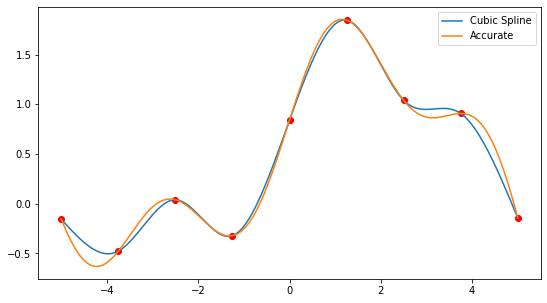

In [114]:
import numpy as np 
class CubicSpline():
    def __init__(self, x = None, y = None, method='complete', a = 0, b = 0):
        self.x = []
        self.y = []
        self.m = []
        if x is not None and y is not None: 
            method = method.lower()
            assert method in ['complete', 'natural', 'periodic']
            self.fit(x, y, method=method, a=a, b=b)
    
    def fit(self, x, y, method='complete', a = 0, b = 0):
        x = np.array(x)
        y = np.array(y)
        self.x = x[:]
        self.y = y[:]
        n = self.x.size 
        diff1 = x[1:] - x[:-1] # x_{i+1} - x_{i}
        diff2 = x[2:] - x[:-2] # x_{i+2} - x_{i}
        mu = diff1[:-1] / diff2 
        la = diff1[1:] / diff2 
        A = np.eye(n) * 2
        A[1:-1,:-2].flat[::n-1] = mu 
        A[1:-1,2:].flat[::n-1] = la 
        diffy = y[1:] - y[:-1]
        r = np.zeros(n)
        r[1:-1] = 6 * ((diffy[1:] / diff1[1:] - diffy[:-1] / diff1[:-1]) / diff2)
        
        if method == 'complete':
            A[0,1] = 1
            A[-1,-2] = 1
            r[0] = 6 * ((y[1] - y[0]) / (x[1] - x[0]) - a) / (x[1] - x[0])
            r[-1] = 6 * (b - (y[-1] - y[-2]) / (x[-1] - x[-2])) / (x[-1] - x[-2])
        elif method == 'natural':
            A[0,0] = 1
            A[-1,-1] = 1
            A[0,1] = 0
            A[-1,-2] = 0
            r[0] = a
            r[-1] = b
        elif method == 'periodic':
            A[0,0] = 1
            A[0,-1] = -1
            A[0,1] = 0
            A[-1,1] = (x[1]-x[0])/(x[1]-x[0]+x[-1]-x[-2])
            r[0] = 0
            r[-1] = 6 * ((y[1] - y[0]) / (x[1] - x[0]) - (y[-1] - y[-2]) / (x[-1] - x[-2])) / (x[1]-x[0]+x[-1]-x[-2])
            
        self.m = np.linalg.solve(A, r)
        # print(self.m)
        
    def pred(self, x):
        # sort x first
        index = np.argsort(np.array(x))
        x = x[index]
        ys = []
        j = 0 
        for i in range(x.shape[0]):
            while self.x[j + 1] < x[i]:
                j += 1
            t = x[i] - self.x[j]
            y = (self.m[j+1] - self.m[j]) / (self.x[j+1] - self.x[j]) / 6
            y = y * t + self.m[j]/2  
            y = y * t + (self.y[j+1] - self.y[j]) / (self.x[j+1] - self.x[j])
            y -= (self.m[j+1]/6 + self.m[j]/3) * (self.x[j+1] - self.x[j])
            y = y * t + self.y[j] 
            ys.append(y)
        unsorted_ys = np.zeros(len(ys))
        for i in range(len(ys)):
            unsorted_ys[index[i]] = ys[i]
        return np.array(unsorted_ys)


# Data in [3] p. 76
# x = np.array([0,1.5,2,3,4.5,5.45,6,7.5,9,9.8,10.5,12,13.38,14.48]) 
# y = np.array([0.28,1.75,2,3.43,3.29,4,4.48,6,7.37,8,8.48,9.27,9.68,9.89])
# CubicSpline(x,y,'natural')
x = np.linspace(-5, 5, 9)
f = lambda x: np.sin(x) + np.cos(1.5*x) * x / 4 + np.sin(0.35*x+1)
x2 = np.linspace(-5, 5, 200)
y2 = CubicSpline(x,f(x),'natural').pred(x2)
from matplotlib import pyplot as plt 
plt.figure(figsize=(9,5))
plt.plot(x2, y2)
plt.plot(x2, f(x2))
plt.scatter(x, f(x), c='red')
plt.legend(['Cubic Spline', 'Accurate'])
plt.show()

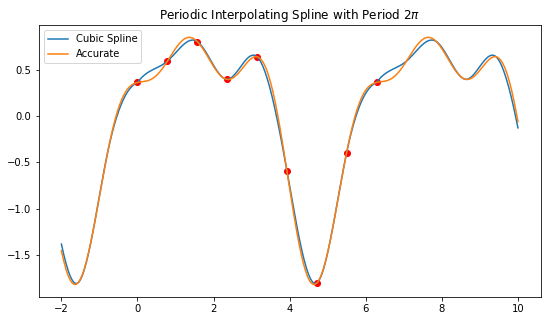

In [118]:
# 周期样条
x = np.linspace(0, 2*np.pi, 9)
f = lambda x: np.sin(x) + np.cos(2*x)/2 + np.cos(3*x+2)/3 #- np.sin(6*x)/2
x2 = np.linspace(-2, 10, 400)
y2 = CubicSpline(x,f(x),'periodic').pred(x2 % (2*np.pi))
from matplotlib import pyplot as plt 
plt.figure(figsize=(9,5))
plt.plot(x2, y2)
plt.plot(x2, f(x2))
plt.scatter(x, f(x), c='red')
plt.legend(['Cubic Spline', 'Accurate'])
plt.title('Periodic Interpolating Spline with Period $2\\pi$')
plt.show()

### 最小化势能

可以证明三次样条插值具有最小化势能的性质, 用数学的语言描述: 给定光滑函数 $f$ 与节点 $x_1,\dotsc,x_n$ 
1. 满足 $g(x_i)=f(x_i)\ (i=1,\dotsc,n)$ 的所有二阶连续可导的函数 $g$ 中, 自然样条插值使得 $\Vert g''(x)\Vert_2$ 最小
2. 满足 $g(x_i)=f(x_i)\ (i=1,\dotsc,n)$ 且 $g'(x_1)=f'(x_1),\ g'(x_n)=f'(x_n)$ 的所有二阶连续可导的函数 $g$ 中, 完全样条插值使得 $\Vert g''(x)\Vert_2$ 最小

## 高维插值

给定一组高维数据以及对应的函数值: $(x_1,y_1)\dotsc,(x_n,y_n)\in \mathbb R^m\times \mathbb R$, 在一个给定的函数空间 $\mathcal V$ 内寻找 $\phi:\ \mathbb R^m\rightarrow \mathbb R\in \mathcal V$ 且 
$$\phi(x_i) = y_i$$

若给定一组基函数 $\phi_1,\dotsc,\phi_n:\ \mathbb R^m\times \mathbb R$ 并定义 
$$\mathcal V\stackrel{\triangle}{=}{\rm span}\{\phi_1,\dotsc,\phi_n\}$$
是 $\phi_i$ 的线性组合. 则称这是线性插值, 即寻找一组系数 $c_i$ 并取 $\phi = c_1\phi_1 + \dotsc + c_n\phi_n$.

代入 $x=x_i$, 得到线性方程组 
$$\left[\begin{matrix}\phi_1(x_1) & \phi_2(x_1) & \dotsc & \phi_n(x_1)\\ 
\phi_1(x_2) & \phi_2(x_2) & \dotsc & \phi_n(x_2)\\
\vdots & \vdots & \ddots & \vdots\\
\phi_1(x_n) & \phi_2(x_n) & \dotsc & \phi_n(x_n)\end{matrix}\right]
\left[\begin{matrix}c_1\\c_2\\ \vdots \\ c_n\end{matrix}\right]
=\left[\begin{matrix}y_1\\y_2\\ \vdots \\ y_n\end{matrix}\right]$$

基函数也可能有无穷多个, 如 (如泰勒展开) 
$$\phi (x) = \sum_{k=0}^{\infty} c_k\phi_k(x)$$
甚至不可数无穷多, 如 (如傅里叶变换)
$$\phi (x) = \int_{-\infty}^{+\infty}c(t)\phi_t(x)dt$$



### 基函数

常用的选取的一组基函数包括但不限于

* 多项式 (polynomials)
* 分段 / 样条多项式 (piecewise / spline polynomials)
* 有理函数 (rational functions)
* 三角函数 (trigonometric functions), 如 $\cos kx,\ \sin kx,\ e^{ikx}$
* 径向基函数 (radial basis functions), 形如 $f(\Vert x-v_k\Vert)$ 的函数, 如 $e^{-\Vert x-v_k\Vert^2},\ (1+\Vert x-v_k\Vert^2)^{-1}$
* 小波函数 (wavelet functions)

#### 二维 Lagrange 插值

若 $(x_i,y_i)\in \mathbb R^2\times \mathbb R$, 即自变量是二维的, 可以将其转化为复数在复平面使用拉格朗日插值 (不常用).

#### Stephard 方法

先取定 $p>0$, 选取 $\phi_k(x) = \frac{\Vert x - x_k\Vert^{-p}}{\sum_{k=0}^n \Vert x - x_k\Vert^{-p}},\quad (k=1,2,\dotsc,n)$ 作为一组由距离确定的基. 

即每个插值点 $x_k$ 对 $x$ 的贡献由距离的次方反比决定. 离得越近贡献越大. 容易见
$$\lim_{x\rightarrow x_k}\phi_k(x) = 1$$
以及 $l\neq k$ 时 $\lim_{x\rightarrow x_l}\phi_k(x) = 0$, 从而
$$\phi (x) = \sum_{k=1}^n y_k\phi_k(x) = \sum_{k=1}^n y_k\frac{\Vert x - x_k\Vert^{-p}}{\sum_{k=0}^n \Vert x - x_k\Vert^{-p}}$$

#### Delaunay 三角剖分

对于二维插值, Delaunay 三角剖分 (Delaunay triangulation) 将所有插值点分割成三角形. 在每个三角形内部, 根据重心坐标确定函数值.

对于高维的数据, 可将三角形类比到单纯形, 有 NURBS (nonuniform rational B-spline) 方法.